In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required lib
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 15})

# Text Pre-processing
import re
import nltk
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer

# 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


In [3]:
#################
#LOAD STOPWORDS
file = open(r'files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [4]:
review_df= pd.read_excel(r'Dataset/tripadvisor_dataset.xlsx', index_col=0)

In [5]:
review_df.head()

,hotel_name,new_text,sentiment
0,Hotel des Arts Saigon Mgallery,tuyệt_vời trải_nghiệm tuyệt_vời ghé thân_thiện...,1
1,Hotel des Arts Saigon Mgallery,đồng_tiền dịch_vụ phong_cách tận_tâm hơi thích...,1
2,Hotel des Arts Saigon Mgallery,ấn_tượng chú_ý mgalery lướt đắm chìm bình_yên ...,1
3,Hotel des Arts Saigon Mgallery,decor thích ngắm bo tròn thư_thái lắm thượng b...,1
4,Hotel des Arts Saigon Mgallery,ấm cúngks không_lớn lắm trang_trí sang_trọng n...,1


In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78968 entries, 0 to 82379
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hotel_name  78968 non-null  object
 1   new_text    78949 non-null  object
 2   sentiment   78968 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ MB


- Dataset have null values

In [7]:
review_df = review_df[['new_text', 'sentiment']]

In [8]:
review_df= review_df.drop_duplicates()
review_df= review_df.reset_index().drop('index', axis= 1)

In [9]:
review_df.dropna(axis= 0, inplace= True)

In [10]:
# Finding total words in cleaned review
cleaner= " ".join(review_df['new_text'])
cleaner= cleaner.split()

# Total number of words present in cleaned reviews
len(cleaner)

1198182

<Axes: xlabel='word_count_new_text', ylabel='Count'>

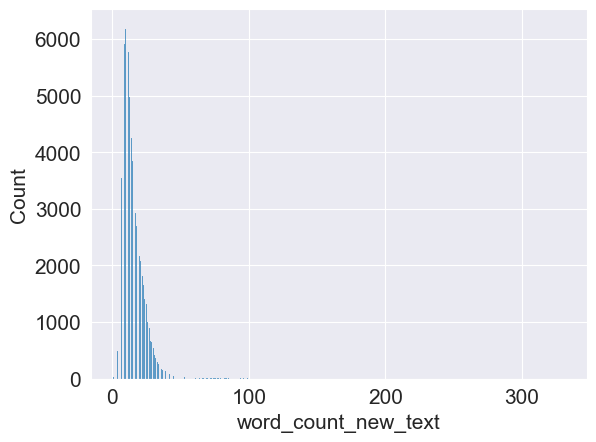

In [11]:
# Number of words in the cleaned Review
review_df['word_count_new_text']= pd.Series([len(item.split()) for item in review_df['new_text']])

# most of the cleaned review
sns.histplot(review_df['word_count_new_text'])

In [12]:
# Finding frequency of all words
all_words= len(cleaner)
print('Total words in clean review is {}'.format(all_words))

word_dist= nltk.FreqDist(cleaner)

# Create dataFrame for word frequency
freg_data_all= pd.DataFrame(word_dist.most_common(all_words), columns= ['Word', 'Frequency'])

# Percertage of word frequency
freg_data_all['PercentFreg_all']= (freg_data_all['Frequency']/freg_data_all['Frequency'].sum())*100
print('No of unique words {}'.format(len(freg_data_all)))
print(freg_data_all.head(10))

Total words in clean review is 1198182
No of unique words 32106
         Word  Frequency  PercentFreg_all
0         tốt      51475         4.296092
1         đẹp      34392         2.870349
2   tuyệt_vời      30445         2.540933
3     sạch_sẽ      20401         1.702663
4  thân_thiện      20206         1.686388
5         gần      18399         1.535576
6        ngon      16371         1.366320
7        nghỉ      15785         1.317413
8       tuyệt      13753         1.147822
9         bơi      13070         1.090819


In [13]:
freg_data_all.head()

,Word,Frequency,PercentFreg_all
0,tốt,51475,4.296092
1,đẹp,34392,2.870349
2,tuyệt_vời,30445,2.540933
3,sạch_sẽ,20401,1.702663
4,thân_thiện,20206,1.686388


In [14]:
# words which are used only once
(freg_data_all['Frequency']==1).value_counts()

Frequency
True     16839
False    15267
Name: count, dtype: int64

In [15]:
counter = Counter(review_df['sentiment'])
counter.items()

dict_items([(1, 67073), (0, 11859)])

Class: 1, Number: 67073, Percentage: 84.98
Class: 0, Number: 11859, Percentage: 15.02


<Axes: xlabel='sentiment', ylabel='count'>

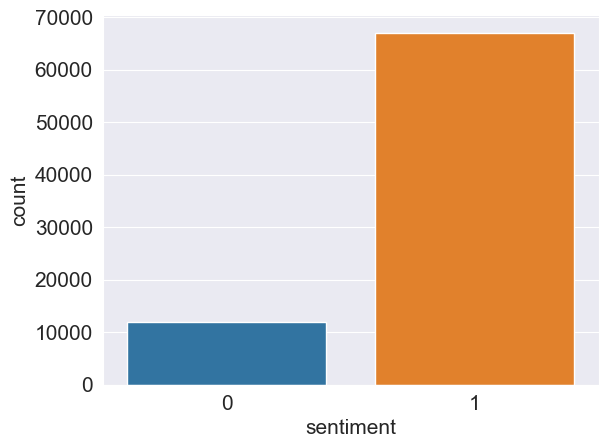

In [16]:
for k, v in counter.items():
    per= v/len(review_df)*100
    print("Class: {}, Number: {}, Percentage: {}".format(k, v, np.round(per, 2)))

sns.countplot(x = review_df['sentiment'])

# Visualization

#### Wordcloud for Entri Reviews

In [17]:
wordcloud= WordCloud(
    width= 3000,
    height= 2000,
    background_color= 'Black',
    colormap= 'Set2',
    stopwords= stopwords_lst,
    max_words= 100,
    random_state= 0
).generate(str(review_df['new_text']))

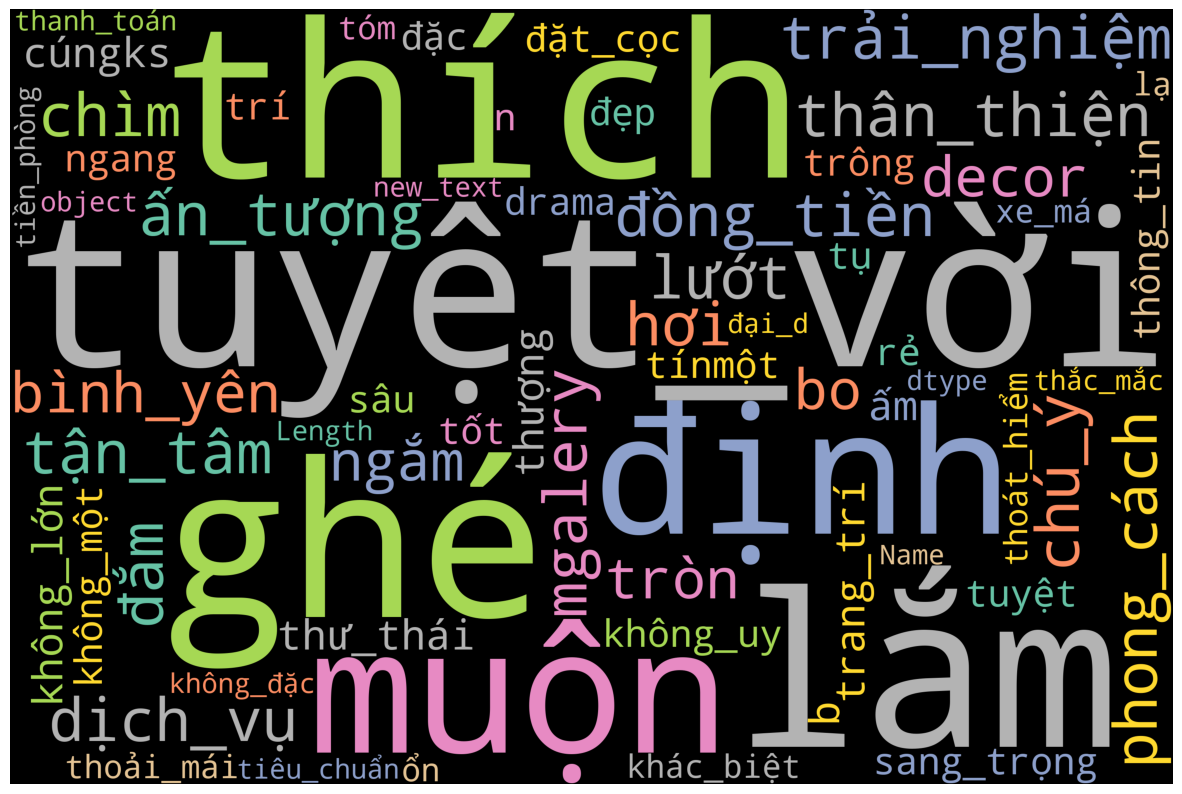

In [18]:
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Wordcloud for Positive Reviews

In [19]:
wordcloud= WordCloud(
    width= 3000,
    height= 2000,
    background_color= 'Black',
    colormap= 'Set2',
    stopwords= stopwords_lst,
    max_words= 100,
    random_state= 0
).generate(str(review_df[review_df['sentiment'] == 1]['new_text']))

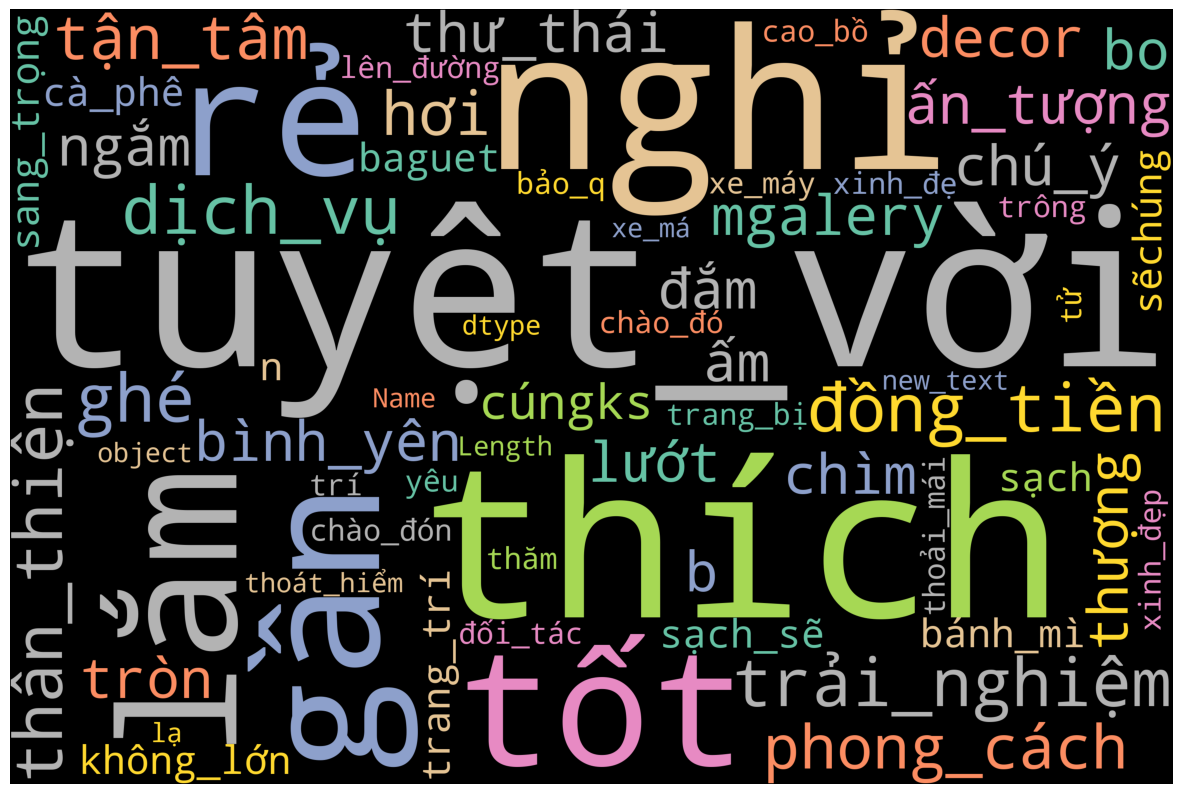

In [20]:
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Wordcloud for Negative Reviews

In [21]:
wordcloud= WordCloud(
    width= 3000,
    height= 2000,
    background_color= 'Black',
    colormap= 'Set2',
    stopwords= stopwords_lst,
    max_words= 100,
    random_state= 0
).generate(str(review_df[review_df['sentiment'] == 0]['new_text']))

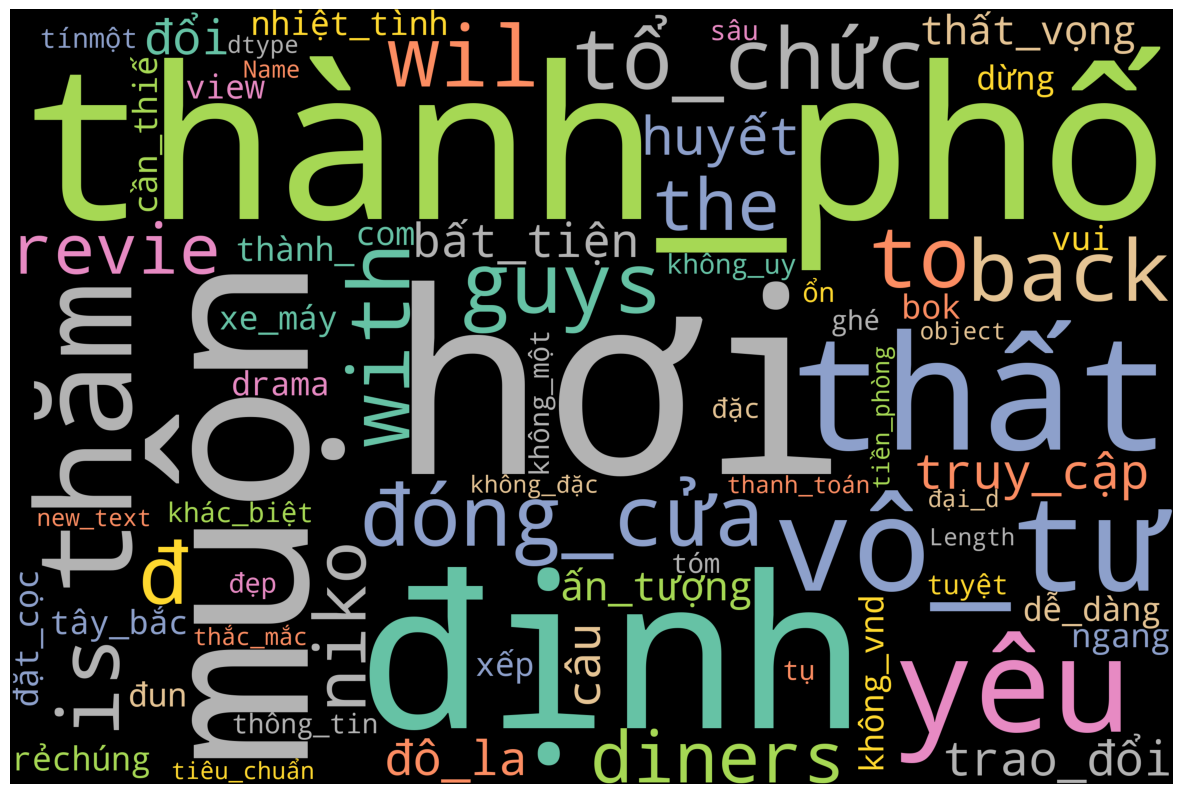

In [22]:
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Train - Test Data create

In [23]:
# Feature Extraction
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [24]:
sentiment_1= review_df[review_df['sentiment']==1]
sentiment_1= sentiment_1.sample(n=11854, random_state=0)

In [25]:
sentiment_0= review_df[review_df['sentiment']==0]

In [26]:
frames= [sentiment_1, sentiment_0]
data= pd.concat(frames)
data['sentiment'].value_counts()

sentiment
0    11859
1    11854
Name: count, dtype: int64

In [27]:
# Creation of X and Y variable
X= data['new_text']
y= data['sentiment']

In [28]:
# 0.8 Train, 0.2 test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state= 0)

In [29]:
tok= Tokenizer(num_words= 100000)
tok.fit_on_texts(X)

In [30]:
import pickle

# saving
with open(r'Dataset/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open(r'Dataset/tokenizer.pickle', 'rb') as handle:
    tok = pickle.load(handle)

In [31]:
X_sequences= tok.texts_to_sequences(X_train)
X_sequences_matrix= sequence.pad_sequences(X_sequences, maxlen= 100)

# Build Model RNN - LSTM

In [32]:
# Define model here
def rnn_model():
    model = Sequential([
        Embedding(100000, 50),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.2),
        Bidirectional(LSTM(256)),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=5e-3),
                  metrics=['accuracy'])
    return model

In [33]:
model= rnn_model()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          5000000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        183296    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 flatten (Flatten)           (None, 512)               0

In [35]:
callbacks= ModelCheckpoint(r'D:\Code\Project-ML\Save_Sentiment_Analysis_Models\model_cp_rnn_under.h5', save_best_only= True, save_weights_only=True, mode='auto', verbose=1, monitor='val_loss')
early= EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20, verbose=1, mode='auto')

In [36]:
# Fit here
history = model.fit(X_sequences_matrix, y_train,
                    batch_size=128,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[callbacks, early])


Epoch 1/100
119/119 [==============================] - ETA: 0s - loss: 0.6944 - accuracy: 0.5130
Epoch 1: val_loss improved from inf to 0.68163, saving model to D:\Code\Project-ML\Save_Sentiment_Analysis_Models\model_cp_rnn_under.h5
119/119 [==============================] - 27s 120ms/step - loss: 0.6944 - accuracy: 0.5130 - val_loss: 0.6816 - val_accuracy: 0.6861
Epoch 2/100
119/119 [==============================] - ETA: 0s - loss: 0.5828 - accuracy: 0.7301
Epoch 2: val_loss improved from 0.68163 to 0.48492, saving model to D:\Code\Project-ML\Save_Sentiment_Analysis_Models\model_cp_rnn_under.h5
119/119 [==============================] - 12s 99ms/step - loss: 0.5828 - accuracy: 0.7301 - val_loss: 0.4849 - val_accuracy: 0.7847
Epoch 3/100
119/119 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.8474
Epoch 3: val_loss improved from 0.48492 to 0.38604, saving model to D:\Code\Project-ML\Save_Sentiment_Analysis_Models\model_cp_rnn_under.h5
119/119 [=================

In [37]:
# Save model
model.save(r'D:\Code\Project-ML\Save_Sentiment_Analysis_Models\LSTM_sentiment_model_undersampling.h5')

#### Predict

In [38]:
from tensorflow.keras.models import load_model

In [39]:
model= load_model(r'D:\Code\Project-ML\Save_Sentiment_Analysis_Models\LSTM_sentiment_model_undersampling.h5')

In [40]:
model.load_weights(r'D:\Code\Project-ML\Save_Sentiment_Analysis_Models\model_cp_rnn_under.h5')

In [41]:
sequences= tok.texts_to_sequences(X_test)
sequences_matrix= sequence.pad_sequences(sequences, maxlen= 100)

In [42]:
sequences_matrix.shape

(4743, 100)

In [43]:
temp= model.predict(sequences_matrix)

In [44]:
temp

array([[0.00494117],
       [0.02399353],
       [0.00471385],
       ...,
       [0.8448808 ],
       [0.00927049],
       [0.9480976 ]], dtype=float32)

In [45]:
predict_df= pd.DataFrame(columns=['sentiment', 'predict'])
predict_df.sentiment= y_test
predict_df.predict= temp

In [46]:
def result(temp):
    return 1 if temp>=0.5 else 0

In [47]:
predict_df.predict= predict_df.predict.apply(lambda x: result(x))

In [48]:
predict_df

,sentiment,predict
44308,0,0
67639,0,0
67629,0,0
72478,0,0
75293,0,0
...,...,...
35253,1,1
19313,1,1
22802,1,1
69489,0,0


In [49]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [50]:
confusion_matrix(predict_df['sentiment'], predict_df['predict'])

array([[1983,  399],
       [ 182, 2179]], dtype=int64)

In [51]:
print(classification_report(predict_df['sentiment'], predict_df['predict']))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2382
           1       0.85      0.92      0.88      2361

    accuracy                           0.88      4743
   macro avg       0.88      0.88      0.88      4743
weighted avg       0.88      0.88      0.88      4743

